In [1]:
# 攝氏與華式溫度轉換
# 載入套件
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 載入上述表格資料
c = np.array([-40, -10,  0,  8, 15, 22,  38],  dtype=float)
f = np.array([-40,  14, 32, 46, 59, 72, 100],  dtype=float)

# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Input((1,)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer=tf.keras.optimizers.Adam(0.1),
  loss='mse',
  metrics=['accuracy'])

# 訓練模型
history = model.fit(c, f, epochs=500, verbose=False)

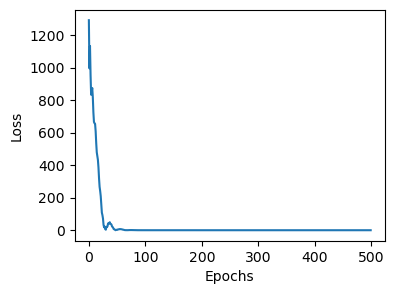

loss=0.043173, accuracy=0.000000


In [2]:
# 損失趨勢繪圖
plt.figure(figsize=(4, 3))
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.plot(history.history['loss'])
plt.show()

# 模型評分
x_test = np.array([50., 100.],  dtype=float)
y_test = np.array([50., 100.],  dtype=float) * 1.8 + 32
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(f'loss={loss:4f}, accuracy={accuracy:4f}')

In [3]:
model.layers[0].weights

[<Variable path=sequential/dense/kernel, shape=(1, 10), dtype=float32, value=[[-0.06629401 -0.23733436  0.29892114 -0.04343526  0.62694466  0.56932855
   -0.6248543  -0.36758828 -0.48824835 -0.17067748]]>,
 <Variable path=sequential/dense/bias, shape=(10,), dtype=float32, value=[ 2.691387  -2.8364308  2.866583   2.7019331  2.8996913  2.8875148
  -2.9007428  2.790482  -2.8911817  2.7793262]>]

In [4]:
model.layers[1].weights

[<Variable path=sequential/dense_1/kernel, shape=(10, 1), dtype=float32, value=[[ 1.2792773 ]
  [-0.75233465]
  [ 0.9316115 ]
  [ 1.6357675 ]
  [ 0.92310435]
  [ 0.68574536]
  [-0.98263586]
  [ 0.8752953 ]
  [-0.94581574]
  [ 1.3266263 ]]>,
 <Variable path=sequential/dense_1/bias, shape=(1,), dtype=float32, value=[2.913932]>]

In [5]:
# 顯示模型第1個Dense權重(w, b)
print(f'第1個Dense權重(w, b):{model.layers[0].weights[0][0].numpy()}, \
    {model.layers[0].weights[1].numpy()}')

第1個Dense權重(w, b):[-0.06629401 -0.23733436  0.29892114 -0.04343526  0.62694466  0.56932855
 -0.6248543  -0.36758828 -0.48824835 -0.17067748],     [ 2.691387  -2.8364308  2.866583   2.7019331  2.8996913  2.8875148
 -2.9007428  2.790482  -2.8911817  2.7793262]


In [6]:
# 顯示模型第2個Dense權重(w, b)
print(f'第2個Dense權重(w, b):{model.layers[1].weights[0][0].numpy()}, \
    {model.layers[1].weights[1].numpy()}')

第2個Dense權重(w, b):[1.2792773],     [2.913932]


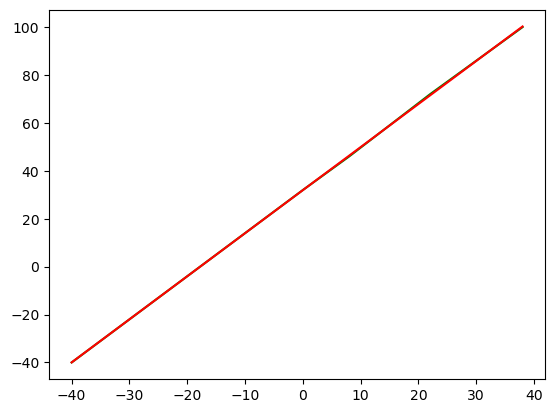

In [7]:
# 繪圖
plt.plot(c, f, 'g')
plt.plot(c, model.predict(c, verbose=False), 'r')
plt.show()